In [1]:
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cmx
import matplotlib.colors as colors
import pandas as pd
import math
from sklearn.linear_model import Lasso as Lasso_Reg
from sklearn import linear_model
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score as val_score
from sklearn.linear_model import LinearRegression as LinReg
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.decomposition import PCA
from sklearn.cross_validation import train_test_split as sk_split
import statsmodels.api as sm

%matplotlib inline

## Introduction

For Milestone 4, we fit linear regressions to the top predictors of cancer, diabetes, and 

## Step 1: Read in DataFrames

### Crop DataFrames
First, we read our crop CSV file into a dataframe for the combined crop data. For each crop name, we select all of the rows in the combined dataframe that pertain to that crop and place those rows in a separate dataframe: i.e., first we select all the information about wheat produts, then barley products, then maize products, etc., and place each of those in its separate dataframe. We keep all these crop dataframes in a list titled `all_crop_dfs` for iterating through later.

In [2]:
#read in crops
allcrops_2000 = pd.read_csv('datasets/allcrops_2000.csv')
# names of all the crops
crop_names = allcrops_2000['ItemName'].unique()

# remove nan
crop_names = crop_names[:-1]
# list to put our separated crop dataframes
all_crop_dfs = []

# find each crop-separated df and put it in the list of dataframes
for crop in crop_names:
    crop_df = allcrops_2000[(allcrops_2000['ItemName'] == crop)]
    all_crop_dfs.append(crop_df)

print crop_names

['Wheat and products' 'Barley and products' 'Maize and products'
 'Rye and products' 'Oats' 'Cereals, Other' 'Potatoes and products'
 'Sugar (Raw Equivalent)' 'Sweeteners, Other' 'Pulses, Other and products'
 'Nuts and products' 'Soyabeans' 'Groundnuts (Shelled Eq)'
 'Coconuts - Incl Copra' 'Sesame seed' 'Olives (including preserved)'
 'Oilcrops, Other' 'Soyabean Oil' 'Groundnut Oil' 'Sunflowerseed Oil'
 'Rape and Mustard Oil' 'Cottonseed Oil' 'Palmkernel Oil' 'Coconut Oil'
 'Sesameseed Oil' 'Olive Oil' 'Maize Germ Oil' 'Oilcrops Oil, Other'
 'Tomatoes and products' 'Onions' 'Vegetables, Other' 'Oranges, Mandarines'
 'Lemons, Limes and products' 'Grapefruit and products' 'Citrus, Other'
 'Bananas' 'Apples and products' 'Pineapples and products' 'Dates'
 'Grapes and products (excl wine)' 'Fruits, Other' 'Coffee and products'
 'Cocoa Beans and products' 'Tea (including mate)' 'Pepper' 'Pimento'
 'Spices, Other' 'Wine' 'Beer' 'Beverages, Fermented'
 'Beverages, Alcoholic' 'Infant food' 'R

## Livestock DataFrames

We repeat the process outlined above, but for livestock data. When completed, we have a list of dataframes, one for each livestock type. Each dataframe contains the pertinent country data for that particular livestock type.

In [3]:
# Do the same as above, but for livestock
livestock_2000 = pd.read_csv('datasets/livestock_2000.csv')
# list of livestock names
livestock_names = livestock_2000['ItemName'].unique()
livestock_names = livestock_names[:-1]

# list to put our separated dataframes
livestock_dfs = []

# separate dataframe based on itemname
for crop in livestock_names:
    crop_df = livestock_2000[(livestock_2000['ItemName'] == crop)]
    livestock_dfs.append(crop_df)

print livestock_names


['Bovine Meat' 'Mutton & Goat Meat' 'Pigmeat' 'Poultry Meat' 'Meat, Other'
 'Offals, Edible' 'Fats, Animals, Raw' 'Milk, Whole' 'Butter, Ghee'
 'Cheese' 'Cream' 'Eggs' 'Honey' 'Freshwater Fish' 'Demersal Fish'
 'Pelagic Fish' 'Marine Fish, Other' 'Crustaceans' 'Cephalopods'
 'Molluscs, Other' 'Aquatic Plants' 'Fish, Body Oil' 'Fish, Liver Oil'
 'Milk - Excluding Butter' 'Meat' 'Offals' 'Animal fats' 'Fish, Seafood'
 'Aquatic Products, Other' 'Aquatic Animals, Others' 'Whey' 'Meat Meal'
 'Meat, Aquatic Mammals' 'Hides and skins']


## Disease Rates

We read in all of the disease information into separate dataframes: one each for diabetes, cardiovascular diseases, and cancer. Each row of each dataframe contains information about the country, year, and three mortality rates. We choose to use the first mortality rate. Below, we show the first five rows from the cardiovascular disease dataframe. 

In [4]:
# read in disease rates
column_headers = ["Country", "Year", "Mortality", "Mortality 2", "Mortality 3"]
diabetes = pd.read_csv('datasets/diabetes.csv', names = column_headers)
cardio = pd.read_csv('datasets/cardiovascular.csv', names = column_headers)
cancer= pd.read_csv('datasets/Cancer.csv', names = column_headers)

In [5]:
cardio.iloc[3:, 0:3].head(n=5)
#cardio.columns = ['Country', 'Year', 'Mortality']

,Country,Year,Mortality
3,Afghanistan,2012,511.5
4,Afghanistan,2000,542.3
5,Albania,2012,436.2
6,Albania,2000,560.5
7,Algeria,2012,396.6


## Separating Disease Dataframes

For each disease dataframe, we separate the dataframe into two separate dataframes: one containing mortality rates from 2000, and one containing mortality rae information for 2012. We do this for cardiovascular diseases, diabetes, and cancer. We also show a few lines from the 2000 diabetes dataframe, just as a sanity check.

In [6]:
cardio_2012 = cardio[(cardio["Year"] == "2012")] 
cardio_2000 = cardio[(cardio["Year"] == "2000")] 

In [7]:
diabetes_2012 = diabetes[(diabetes['Year'] == '2012')] 
diabetes_2000 = diabetes[(diabetes['Year'] == '2000')] 
diabetes_2000.head()

,Country,Year,Mortality,Mortality 2,Mortality 3
4,Afghanistan,2000,34.0,35.1,32.8
6,Albania,2000,8.3,8.2,8.3
8,Algeria,2000,67.2,62.1,73.4
10,Angola,2000,35.0,36.4,33.2
12,Argentina,2000,19.9,16.0,25.2


In [8]:
cancer_2012 = cancer[(cancer['Year'] == ' 2012')] 
cancer_2000 = cancer[(cancer['Year'] == ' 2000')] 
cancer_2012.head()

,Country,Year,Mortality,Mortality 2,Mortality 3
3,Afghanistan,2012,123.6,110.6,142.2
5,Albania,2012,123.1,105.3,142.5
7,Algeria,2012,80.6,78.0,83.9
9,Angola,2012,89.6,86.1,97.9
11,Argentina,2012,131.5,109.1,166.5


In [9]:
cardio_2000.head(n=5)

,Country,Year,Mortality,Mortality 2,Mortality 3
4,Afghanistan,2000,542.3,554.1,523.1
6,Albania,2000,560.5,494.7,638.6
8,Algeria,2000,434.7,401.2,472.2
10,Angola,2000,383.4,385.2,375.2
12,Argentina,2000,226.6,169.1,302.8


In [10]:
all_foods = all_crop_dfs
print len(all_foods)

89


## Function for Generating Scatterplots
For each disease, we generate scatterplots plotting consumption of each food against mortality rates for that disease.

We have a function, food_cardio_plot, that generates a scatter plot of consumption of a particular type of food against cardiovascular mortality rates. We pass in a food dataframe with information about global consumption about that food, the cardiovascular disease mortality dataframe, and the axes on which to plot. We iterate through the different country data in the food dataframe, make sure that the country is present in the disease dataframe, and if so we plot that point. We also reshape the food_amounts so we can fit a linear regression and print the R^2 above the scatter plot. 

We also create two other similar functions that generate scatter plots for cancer and diabetes, while alsop rinting the R^2 value above each scatter plot. 

In [11]:
# plot for cardio
def food_cardio_plot(food_df, cardio, ax):
    morts = []
    food_amts = []
    
    # for each country
    for country in food_df['AreaName'].values:
        # make sure it's in the disease df
        if not cardio[(cardio['Country'] == country)].empty:
            # find the disease data for that country
            country_data = cardio[(cardio['Country'] == country)]
            # find mortality rate
            mort = country_data.iloc[1,2]
            # append to mortality list
            morts.append(float(mort))
            # find amount of that particular food consumed in that country
            food_amt = food_df[(food_df['AreaName'] == country)].iloc[0, 9]
            # append to food_amounts
            food_amts.append(float(food_amt))
    
    # scatter the amounts against mortality rates
    ax.scatter(food_amts, morts)
    
    # reshape for LinReg to get R^2
    X = np.array(food_amts).reshape(-1, 1)
    y = np.array(morts)
    
    if (len(food_df['ItemName'].values) > 0) and (X.shape[0] > 0):
        # linreg
        regr = LinReg()
        # fit, score linreg
        regr.fit(X, y)
        score = regr.score(X,y)
        ax.set_title("R^2 = " + str(score))
    
    ax.set_xlabel(food_df['ItemName'].values[0])
    ax.set_ylabel('Cancer Disease Mortality Rate')
    
    return ax, score
    

In [12]:
# Diabetes plot works the same way except for diabetes
def food_diabetes_plot(food_df, cardio, ax):
    morts = []
    food_amts = []
    for country in food_df['AreaName'].values:
        if not cardio[(cardio['Country'] == country)].empty:
            country_data = cardio[(cardio['Country'] == country)]
            mort = country_data.iloc[1,2]
            morts.append(float(mort))
            food_amt = food_df[(food_df['AreaName'] == country)].iloc[0, 9]
            food_amts.append(float(food_amt))
    ax.scatter( food_amts, morts)
    X = np.array(food_amts).reshape(-1, 1)
    y = np.array(morts)
    if (len(food_df['ItemName'].values) > 0) and (X.shape[0] > 0):
        regr = LinReg()
        regr.fit(X, y)
        score = regr.score(X,y)
        ax.set_title("R^2 = " + str(score))
    
    ax.set_xlabel(food_df['ItemName'].values[0] + str('(kg/capita/yr)'))
    ax.set_ylabel('Diabetes Disease Mortality Rate')
    
    return ax, score

In [13]:
# Cancer works the same way except for cancer
def food_cancer_plot(food_df, cardio, ax):
    morts = []
    food_amts = []
    for country in food_df['AreaName'].values:
        if not cardio[(cardio['Country'] == country)].empty:
            country_data = cardio[(cardio['Country'] == country)]
            mort = country_data.iloc[1,2]
            morts.append(float(mort))
            food_amt = food_df[(food_df['AreaName'] == country)].iloc[0, 9]
            food_amts.append(float(food_amt))
    ax.scatter(food_amts, morts)
    
    X = np.array(food_amts).reshape(-1, 1)
    y = np.array(morts)
    
    if (len(food_df['ItemName'].values) > 0) and (X.shape[0] > 0):
        regr = LinReg()
        regr.fit(X, y)
        score = regr.score(X,y)
        ax.set_title("R^2 = " + str(score))
        ax.set_xlabel(food_df['ItemName'].values[0])
        ax.set_ylabel('Cancer Disease Mortality Rate')
    return ax, score

## Generating Scatterplots

Here, we create a figure with subplots for all of our scatter plots for cardiovascular mortality rates. We iterate through the list of axes / food dataframes and use our function to plot the scatter plot for a particular food on each axis. We also store the r^2 values for use later in a list (cardio_crop_r^2) for selecting predictors for our baseline model.  We repeat this for cancer and diabetes, storing r^2 in lists titled cancer_crop_r^2 and diabetes_crop_r^2 respectively. Then, we repeat this process for each of our livestock dataframes as well to generate scatter plots of consumption of each livestock type against disease mortality rates.

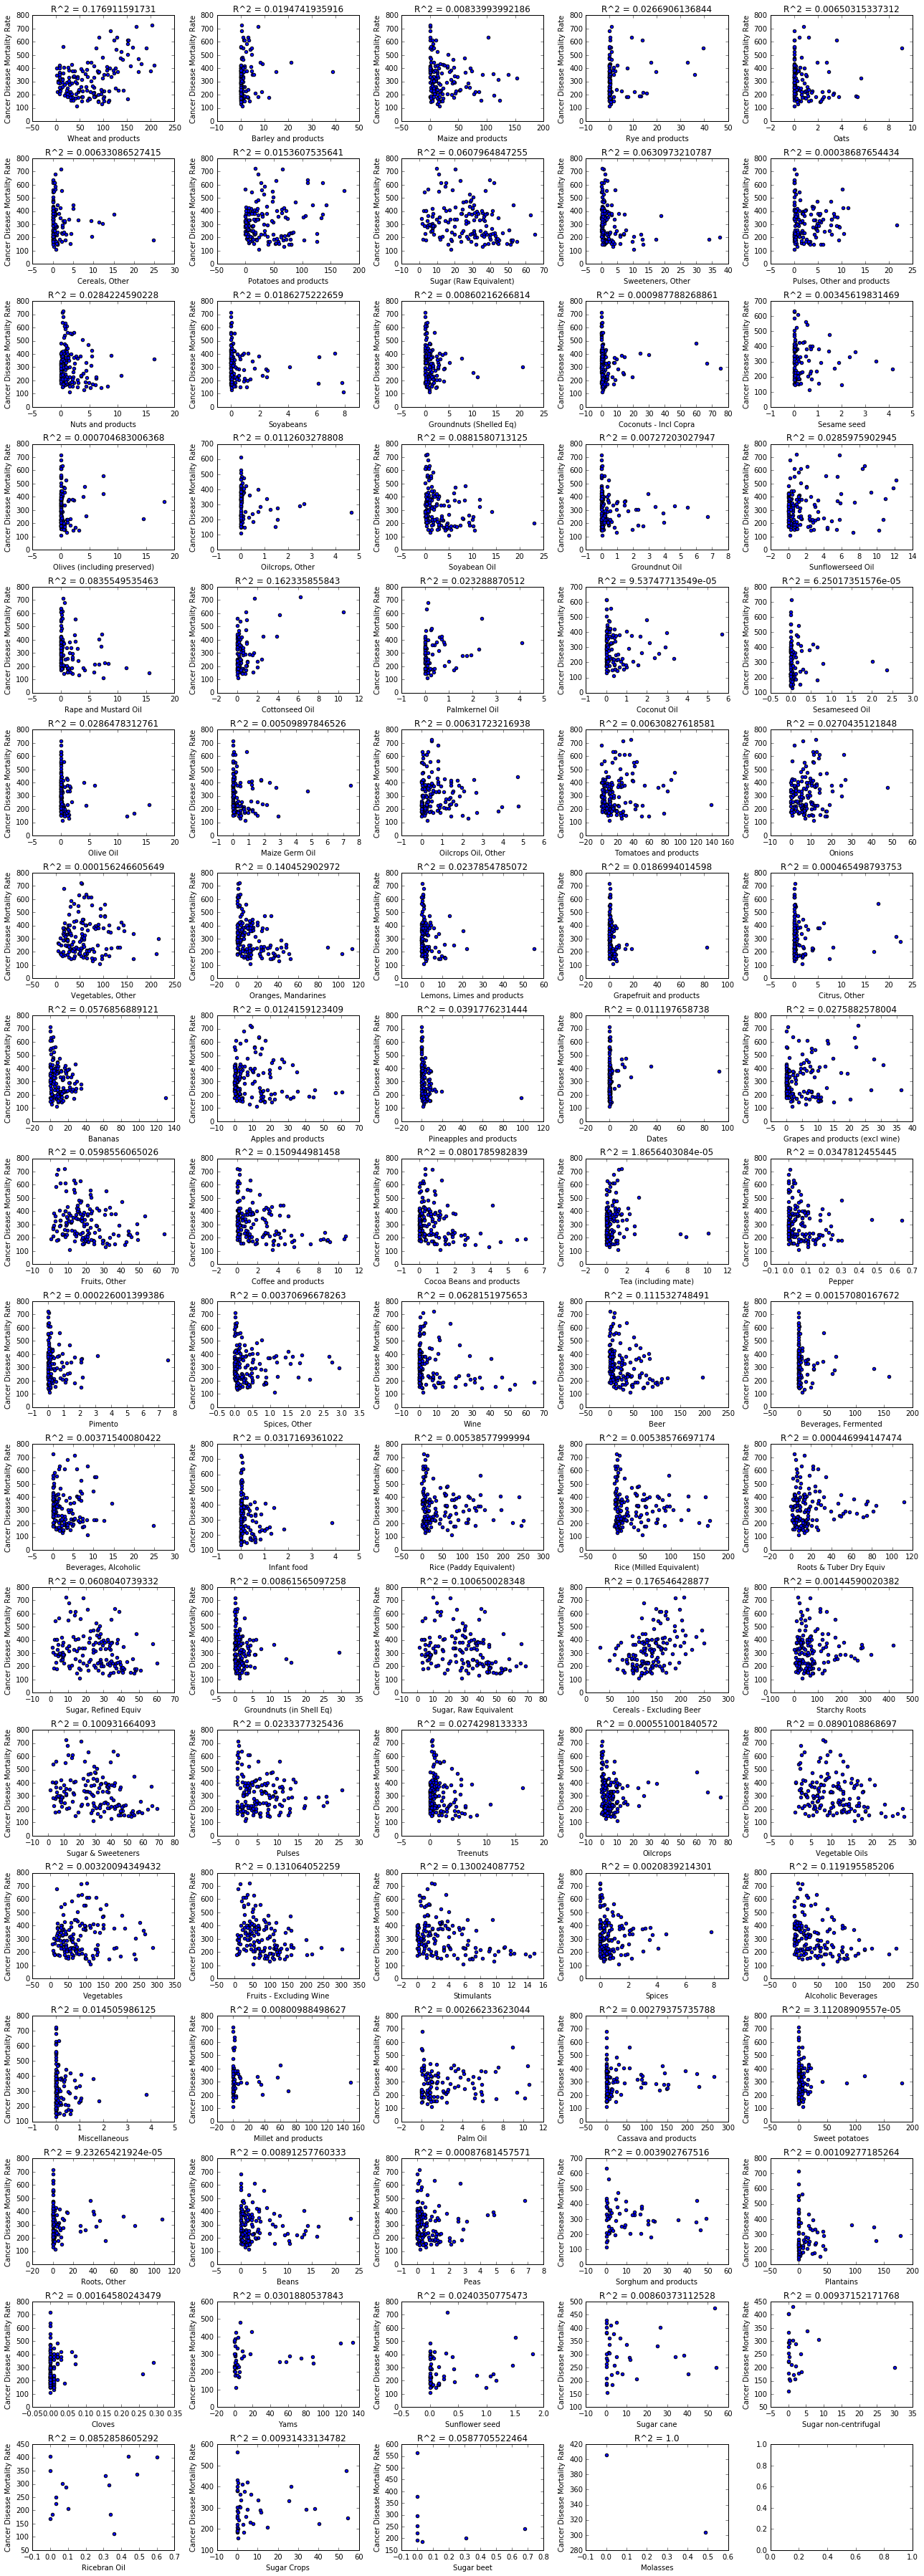

In [14]:
fig, ax = plt.subplots(18, 5, figsize=(18, 50))

#flatten list of axes
axes = [e for l in ax for e in l]

# store r2s
cardio_crop_r2 = {}

# go through and plot each one
for df, ax in zip(all_crop_dfs, axes):
    ax, r2 = food_cardio_plot(df, cardio, ax)
    crop_name = df['ItemName'].values[0]
    cardio_crop_r2[crop_name] = r2

plt.tight_layout()
plt.show()

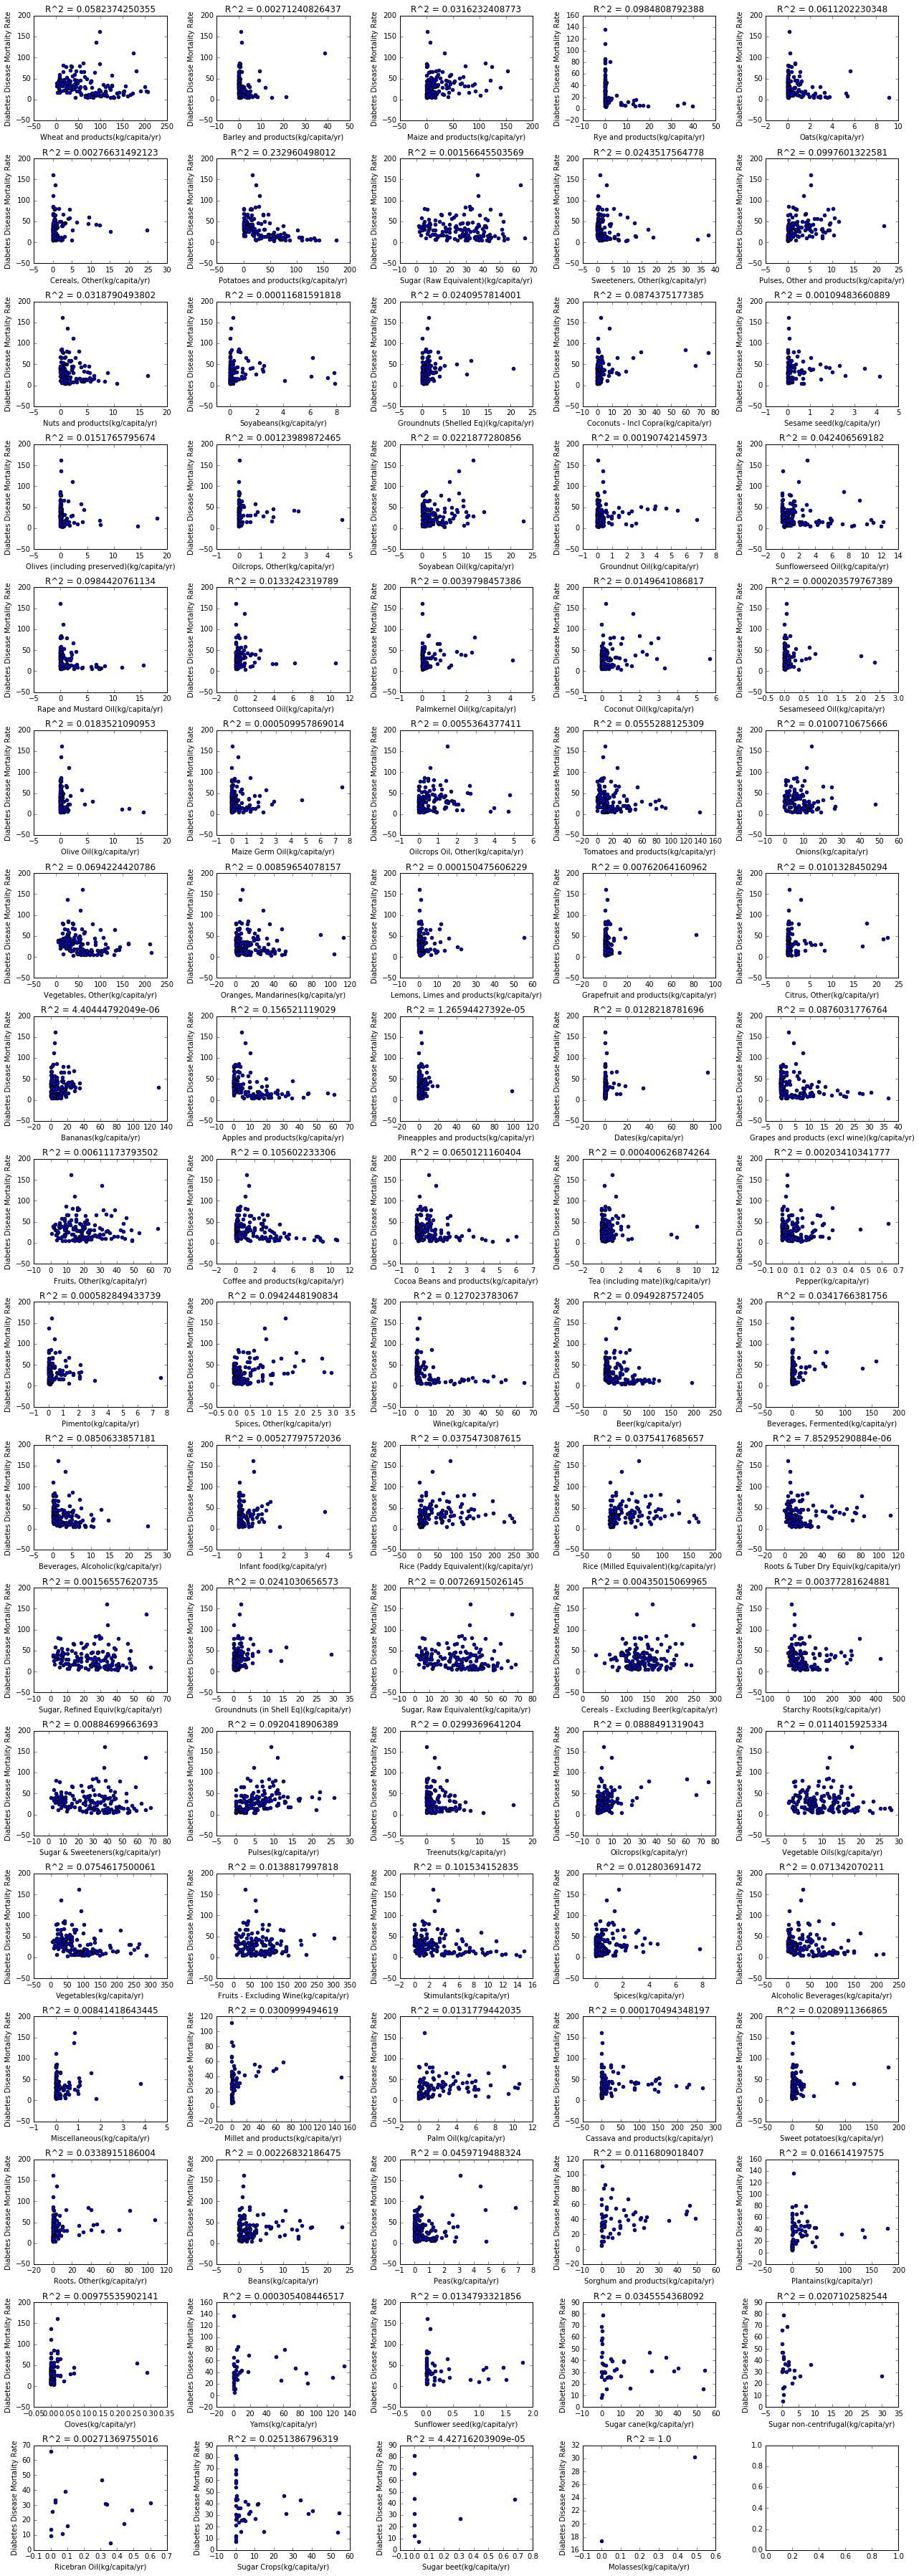

In [15]:
fig, ax = plt.subplots(18, 5, figsize=(18, 50))

# flatten list of axes
axes = [e for l in ax for e in l]

# store r2s
diabetes_crop_r2 = {}
    
# iterate through
for df, ax in zip(all_crop_dfs, axes):
    ax, r2 = food_diabetes_plot(df, diabetes, ax)
    crop_name = df['ItemName'].values[0]
    diabetes_crop_r2[crop_name] = r2


plt.tight_layout()
plt.show()

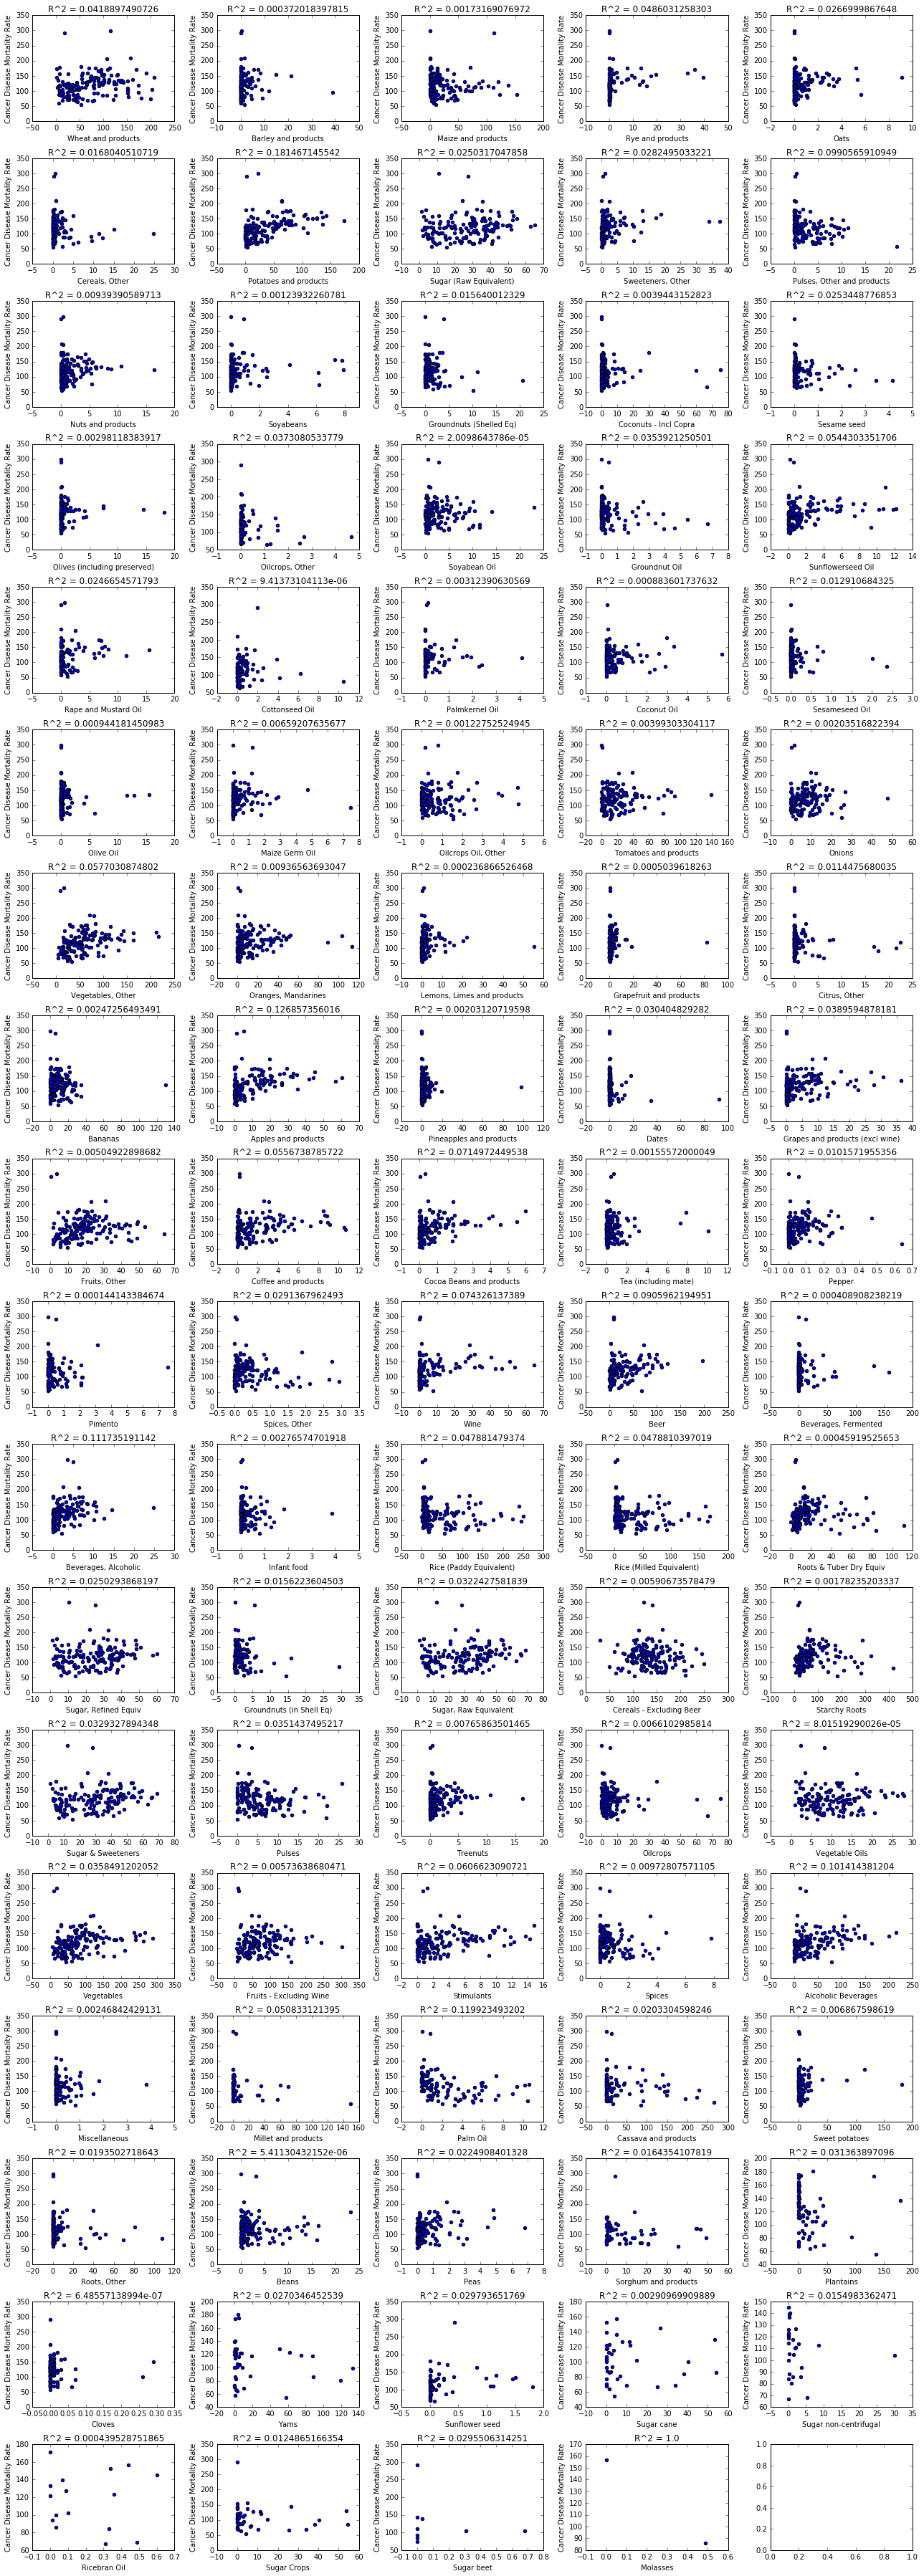

In [16]:
fig, ax = plt.subplots(18, 5, figsize=(18, 50))

# flatten list of axes
axes = [e for l in ax for e in l]

# store r2s
cancer_crop_r2 = {}

# go through
for df, ax in zip(all_crop_dfs, axes):
    ax, r2 =food_cancer_plot(df, cancer, ax)
    crop_name = df['ItemName'].values[0]
    cancer_crop_r2[crop_name] = r2

plt.tight_layout()
plt.show()

UnboundLocalError: local variable 'score' referenced before assignment

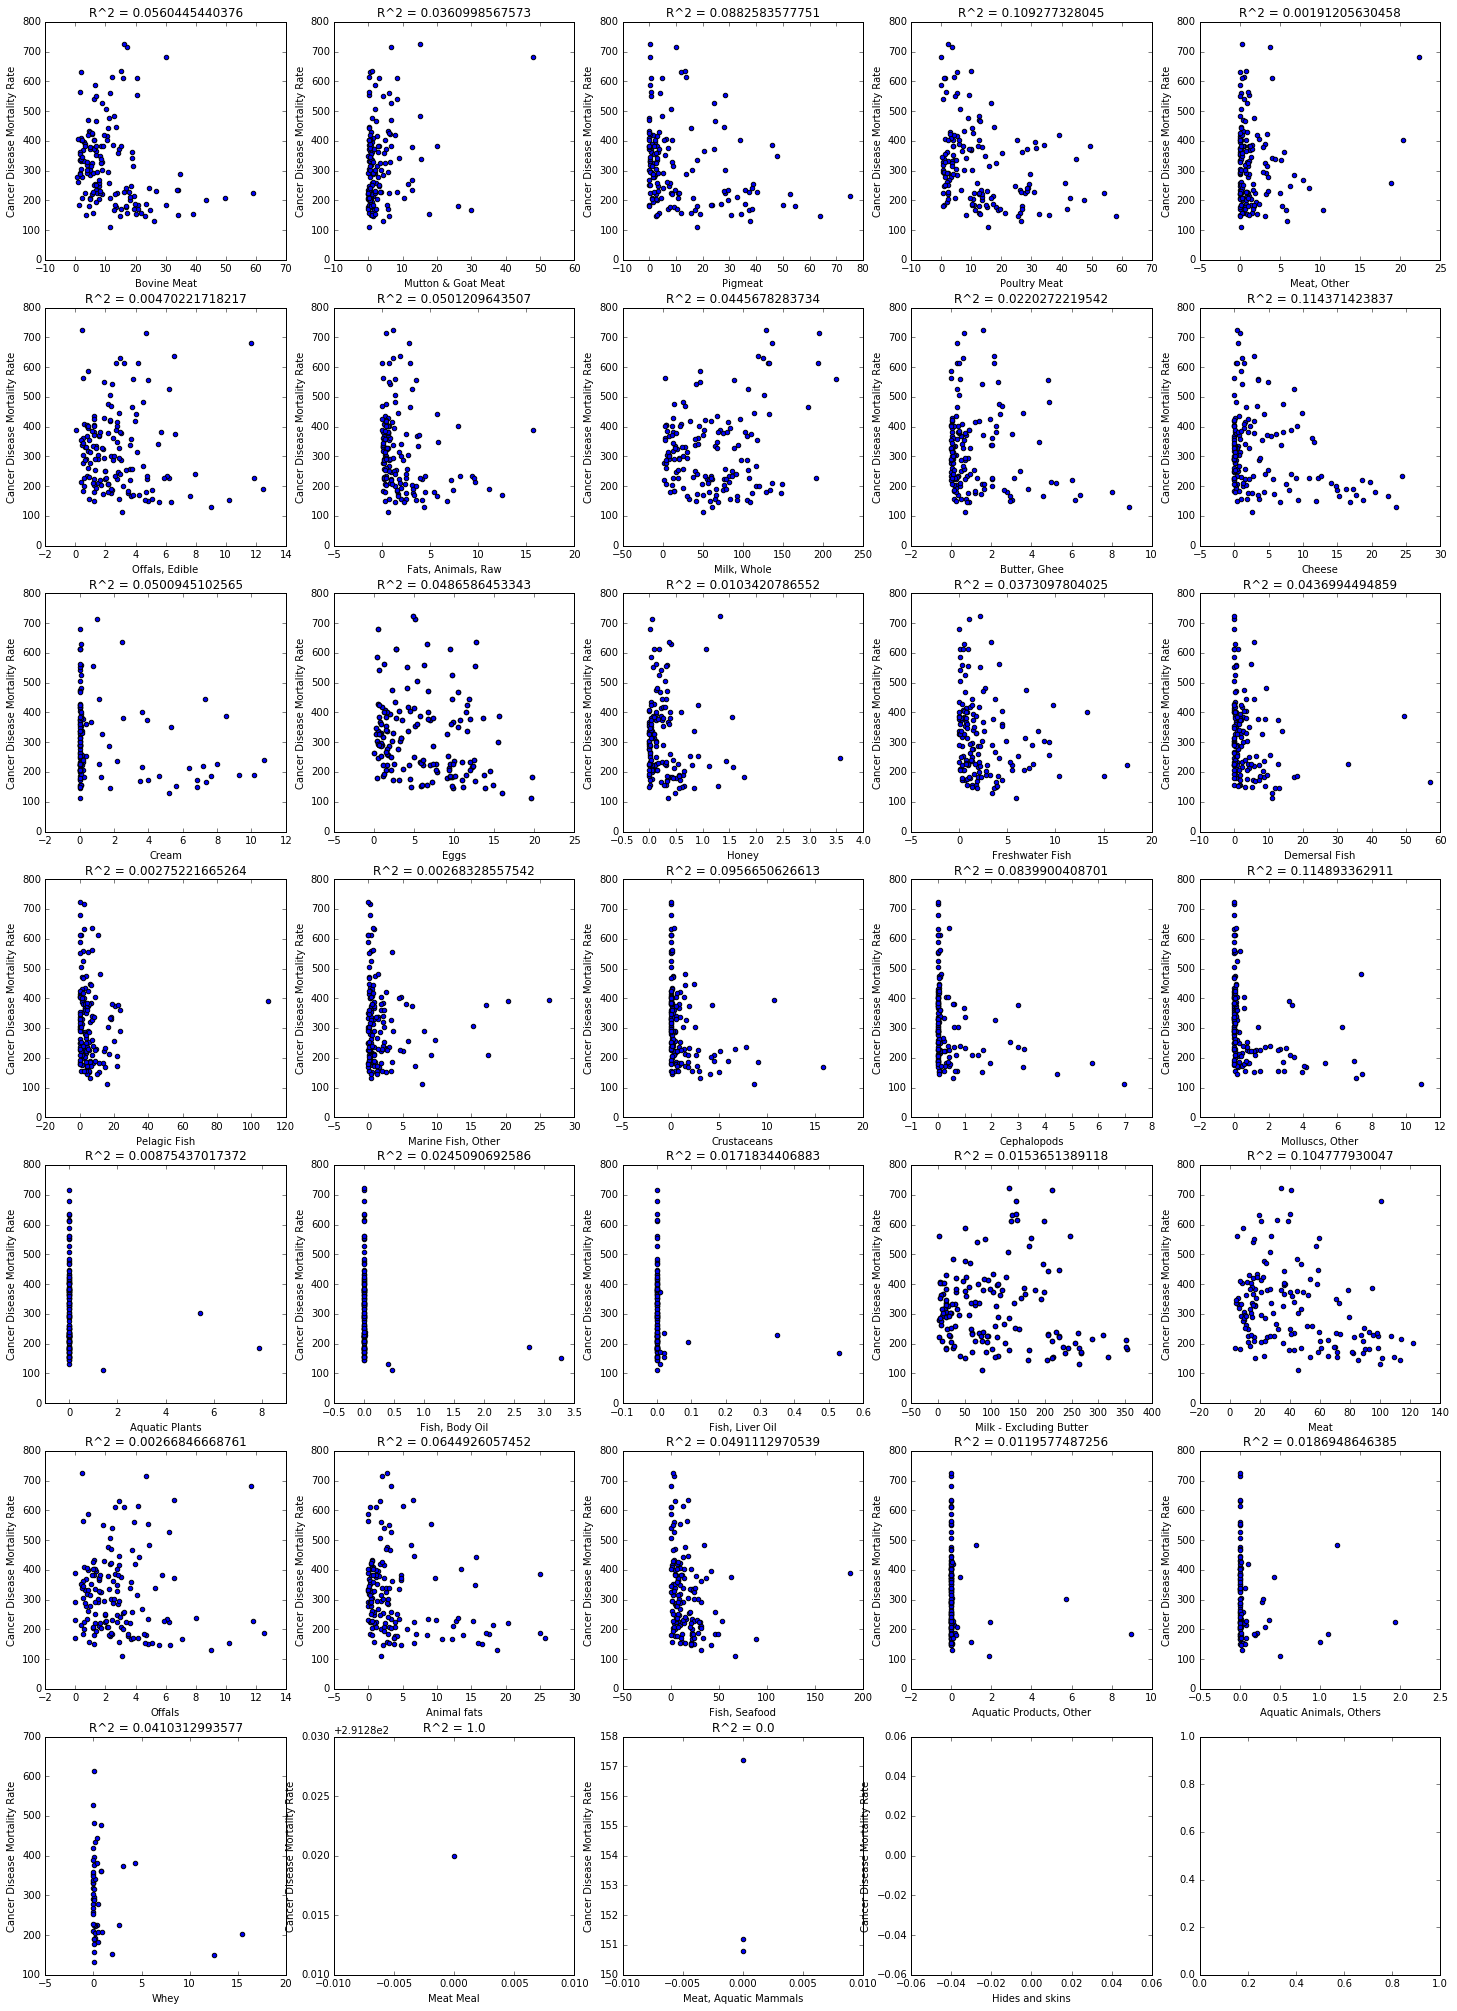

In [17]:
fig, ax = plt.subplots(7, 5, figsize=(25, 35))

axes = [e for l in ax for e in l]

cardio_livestock_r2 = {}

for df, ax in zip(livestock_dfs, axes):
    ax, r2 =food_cardio_plot(df, cardio, ax)
    livestock_name = df['ItemName'].values[0]
    cardio_livestock_r2[livestock_name] = r2

plt.tight_layout()
plt.show()

UnboundLocalError: local variable 'score' referenced before assignment

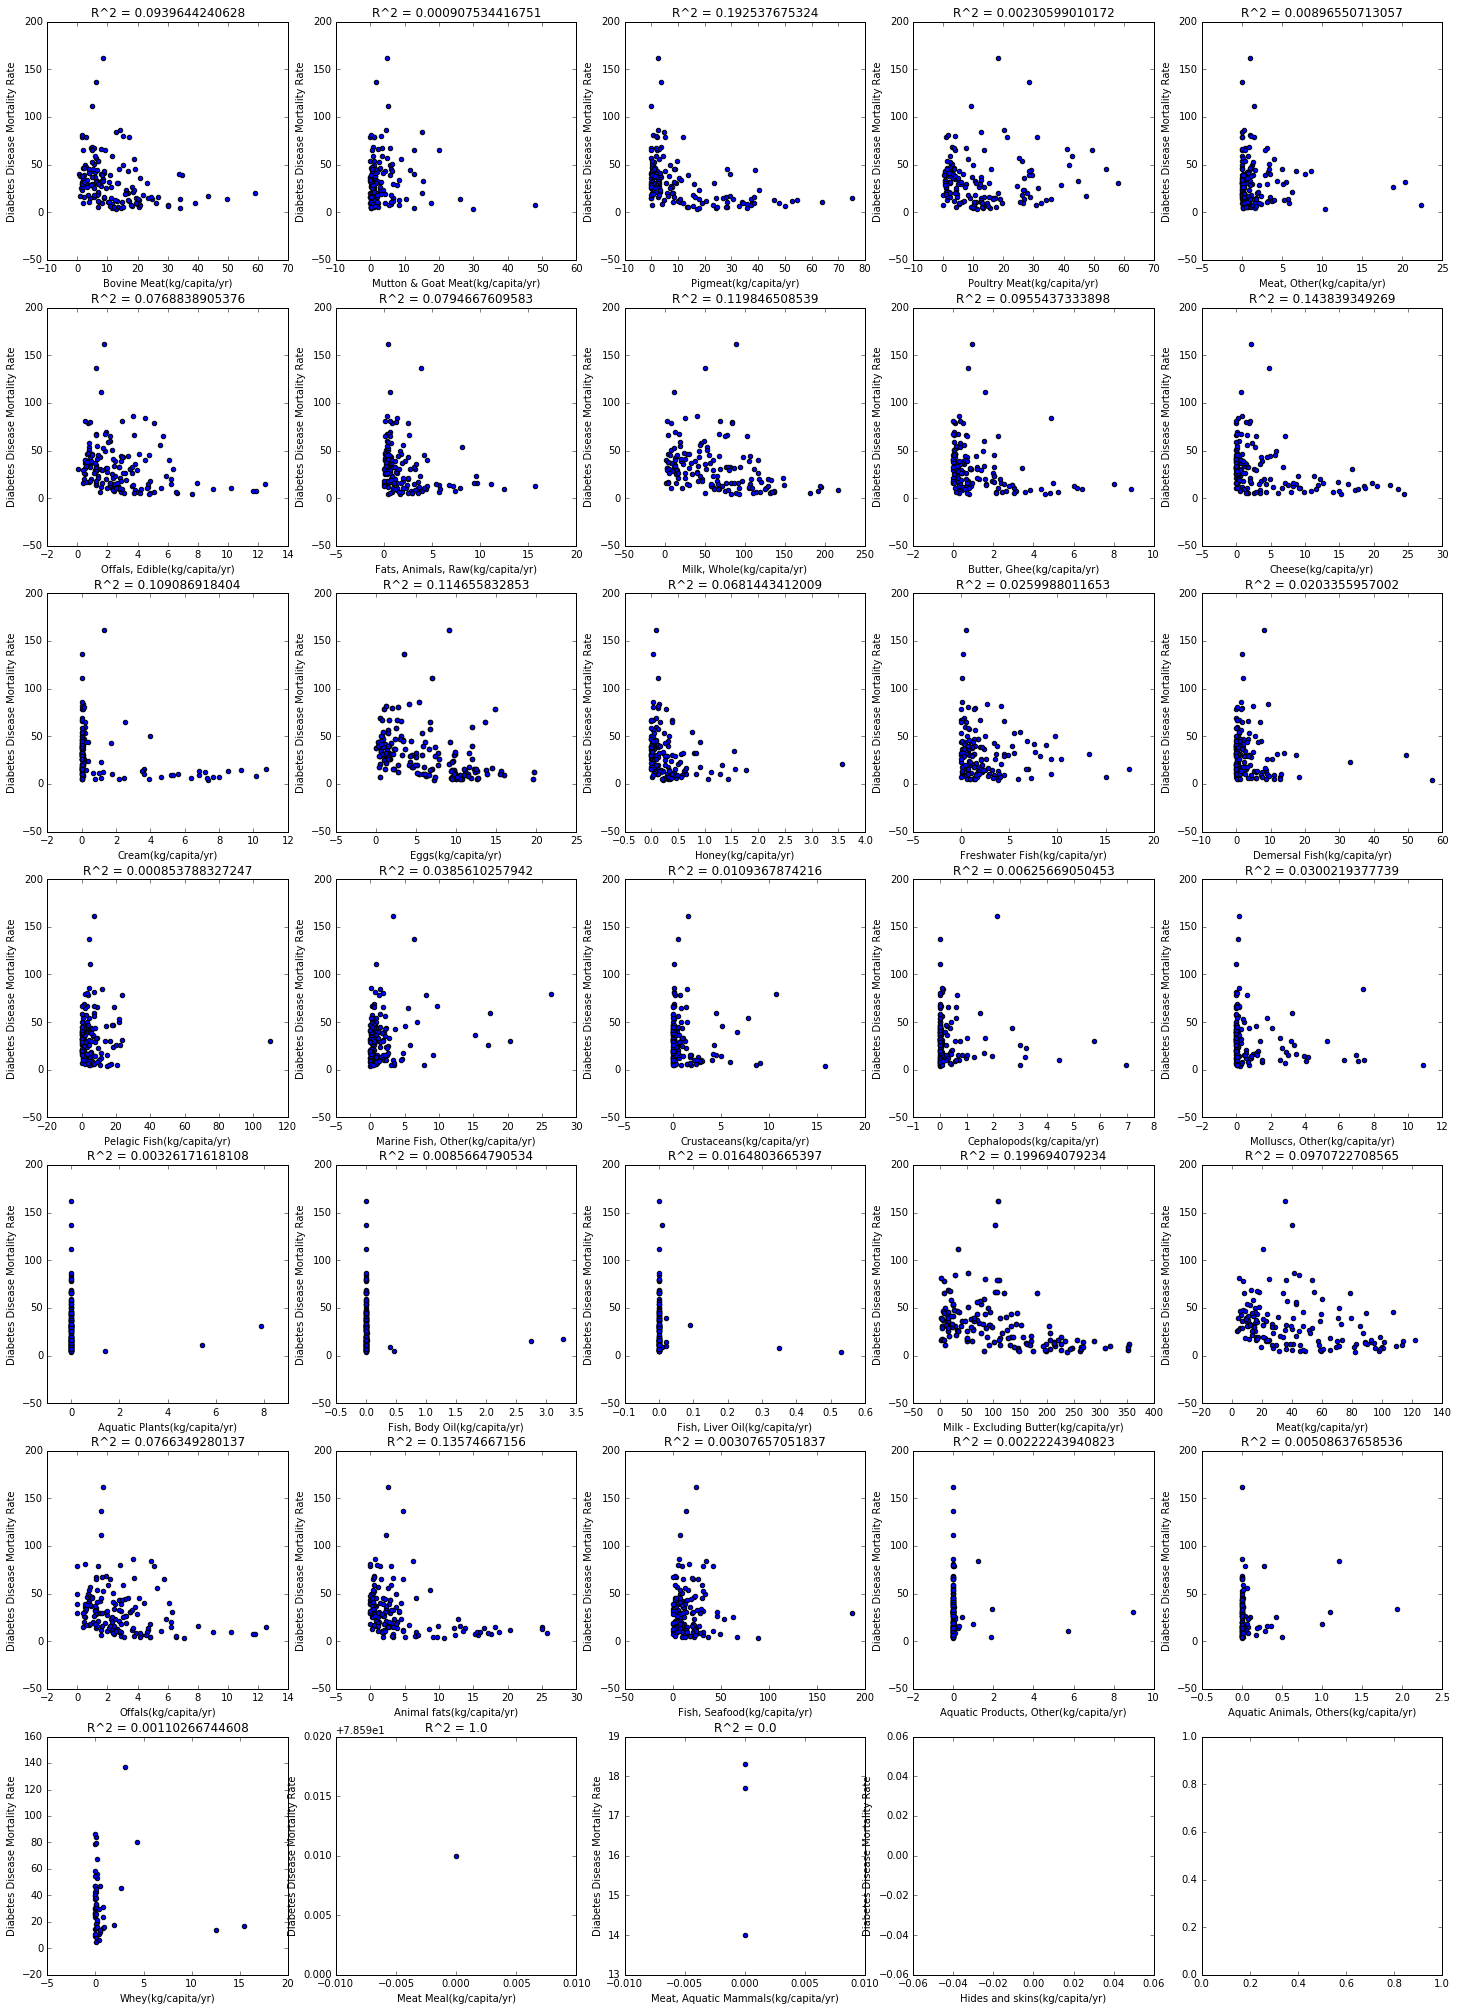

In [18]:
fig, ax = plt.subplots(7, 5, figsize=(25, 35))

axes = [e for l in ax for e in l]

diabetes_livestock_r2 = {}

for df, ax in zip(livestock_dfs, axes):
    ax, r2 =food_diabetes_plot(df, diabetes, ax)
    livestock_name = df['ItemName'].values[0]
    diabetes_livestock_r2[livestock_name] = r2

plt.tight_layout()
plt.show()

UnboundLocalError: local variable 'score' referenced before assignment

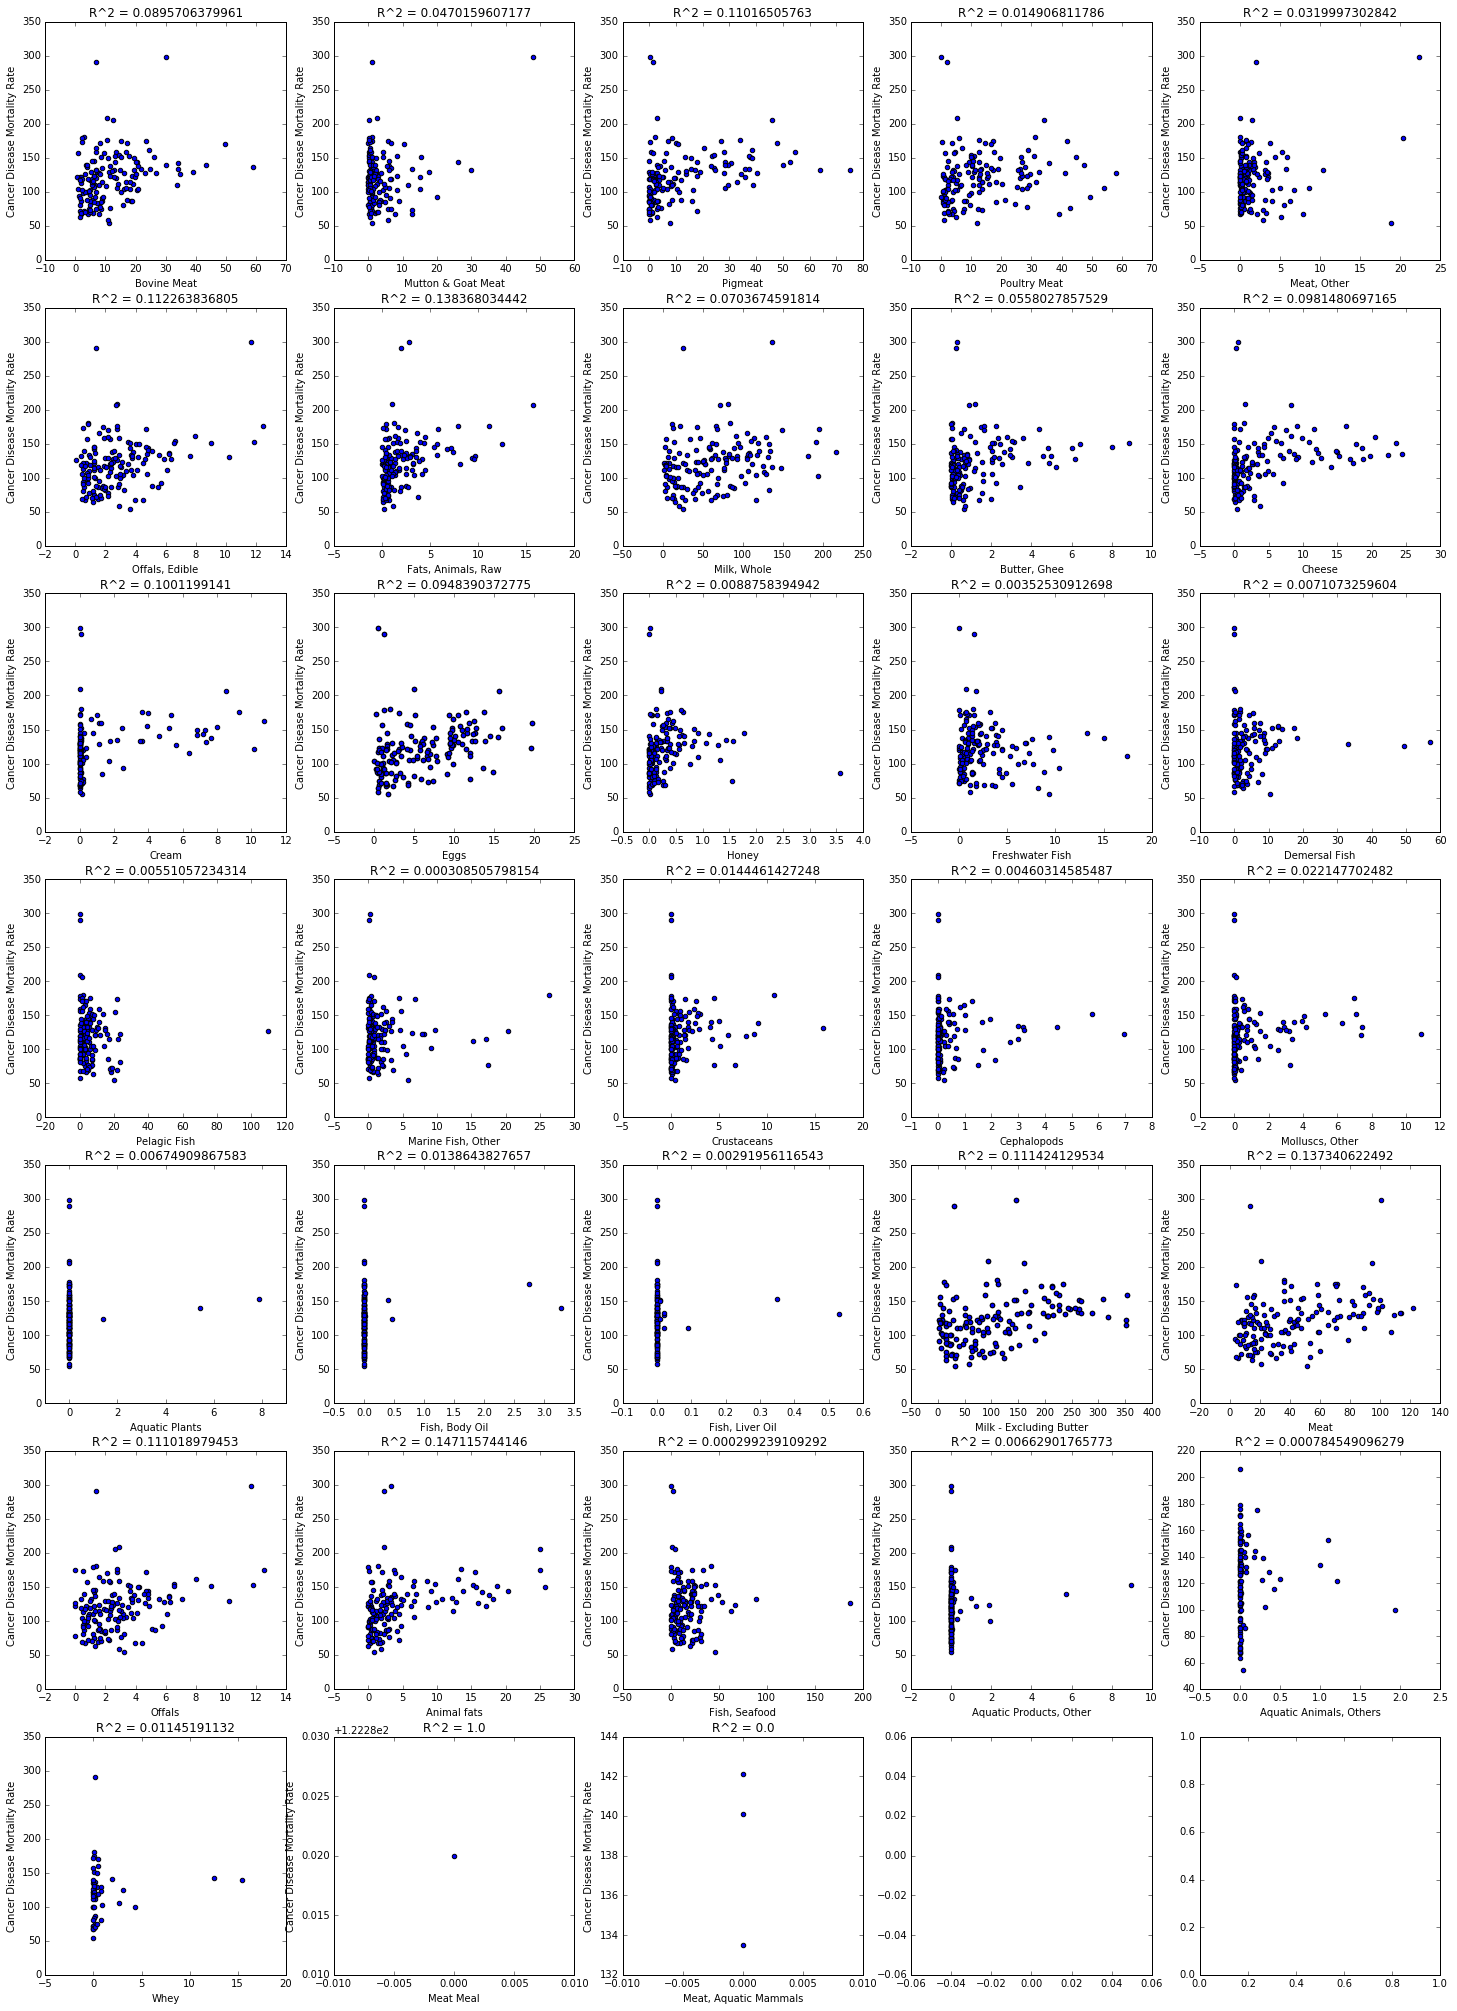

In [19]:
fig, ax = plt.subplots(7, 5, figsize=(25, 35))

axes = [e for l in ax for e in l]

cancer_livestock_r2 = {}

for df, ax in zip(livestock_dfs, axes):
    ax, r2 =food_cancer_plot(df, cancer, ax)
    livestock_name = df['ItemName'].values[0]
    cancer_livestock_r2[livestock_name] = r2

plt.tight_layout()
plt.show()

## Combining Dataframes

We created a dictionary to store all dataframes (both crop and livestock), where the key is the name of the food. For each disease, we also combine our data on R^2 values for crops and livestock into a single dictionary with $R^2$ information for both.

In [ ]:
# dictionary of all dataframes, crop and livestock
all_dfs = {}
for df in all_crop_dfs:
    crop_name = df['ItemName'].values[0]
    all_dfs[crop_name] = df

for df in livestock_dfs:
    crop_name = df['ItemName'].values[0]
    all_dfs[crop_name] = df

In [ ]:
print len(cancer_crop_r2)
print len(cancer_livestock_r2)
for k, v in cancer_livestock_r2.items():
    cancer_crop_r2[k] = v
print len(cancer_crop_r2)

In [ ]:

for k, v in diabetes_livestock_r2.items():
    diabetes_crop_r2[k] = v

In [ ]:
print len(cardio_crop_r2)
print len(cardio_livestock_r2)
for k, v in cardio_livestock_r2.items():
    cardio_crop_r2[k] = v
print len(cardio_crop_r2)

## Sorting Predictors
For each disease, we ranked the R^2 values from greatest to least and ignored special cases, i.e. R^2 values of 1.0 that resulted from only two data points total for a certain food, and used consumption of the top X foods as features to fit our linear model. 

In [ ]:
cancer_r2_sort = sorted(cancer_crop_r2.items(), key= lambda x: -x[1])
diabetes_r2_sort = sorted(diabetes_crop_r2.items(), key= lambda x: -x[1])
cardio_r2_sort = sorted(cardio_crop_r2.items(), key= lambda x: -x[1])

In [ ]:
print cardio_r2_sort

In [ ]:
print cancer_2000.shape
cancer_2000.head(n=5)

# Lin Reg for Cardio

After sorting the list of predictors by $R^2$, we include the top $N$ predictors in fitting a linear regression to cardiovascular disease mortality rates. First, we iterated through the countries, and for countries that did not have all of the top $N$ predictors, we dropped that particular country from our dataset. We also excluded certain special cases, i.e. such as R^2 values of 1.0 that resulted from only two data points total for a certain food type. After generating this list of predictors, we then sort it by $R^2$ and include the top $N$ in our linear regression. We tested a range of different values of $N$, and found that in general more features used, the better the $r^2$ in our model.

In [ ]:
N = 15
#x = pd.DataFrame({}) 

countries = list(cancer_2000['Country'].values)
cols = []
for name, r2 in cardio_r2_sort[:N]:
    if r2 != 1.0 and name != 'Cottonseed Oil':
        df = all_dfs[name]
        print df.shape
        cols.append(name)
        for country in countries:
            if country not in df['AreaName'].values:
                countries.remove(country)
print len(countries)

x = []
for country in countries:
    predictors = []
    for name, r2 in cardio_r2_sort[:N]:
        if r2 != 1.0 and name != 'Cottonseed Oil':
            df = all_dfs[name]
            for index, area in enumerate(df['AreaName'].values):
                if area == country and not math.isnan(df['Value'].values[index]):
                    predictors.append(df['Value'].values[index])
    x.append(predictors)

x_df = pd.DataFrame(x, columns = cols)
x_df.head(n=5)                 
    
        
    

Here, we separated predictors from y values and placed the y-values in a separate dataframe for ease of access.

In [ ]:
y = []
for country in countries:
    for index, area in enumerate(cancer_2000['Country'].values):
        if area == country:
            y.append(cancer_2000['Mortality'].values[index])
            
y_df = pd.DataFrame(y, columns = ['Cancer Mortality Rate'])
y_df.head(n=5)

Dataframe of predictors, sorted by $R^2$ value and excluding certain foods/ predictors that only had one or two data points.

In [ ]:
x_df.head(n=30)

## Fitting LinReg
We fit the LinReg to the top $N$ predictors as described above and print the $R^2$ value from our linear regression.

In [ ]:
last = -1
linreg = LinReg()
#linreg.fit(x_df.iloc[:, :last], y_df)
#linreg.score(x_df.iloc[:, :last], y_df)
linreg.fit(x_df, y_df)
linreg.score(x_df, y_df)

# Lin Reg for Diabetes

We repeat the process described above for diabetes data. Essentially, we clean the data to make sure we don't have missing values and then sort by $R^2$ value. We take the top $N$ predictors and fit a linear regression to those predictors.

In [ ]:
N = 22
#x = pd.DataFrame({}) 

countries = list(diabetes_2000['Country'].values)
cols = []
for name, r2 in diabetes_r2_sort[:N]:
    if r2 != 1.0 and name != 'Rye and products' and name != 'Rape and Mustard Oil':
        df = all_dfs[name]
        print df.shape
        cols.append(name)
        for country in countries:
            if country not in df['AreaName'].values:
                countries.remove(country)
print len(countries)
print cols
print len(cols)

x = []
for country in countries:
    predictors = []
    for name, r2 in diabetes_r2_sort[:N]:
        if r2 != 1.0 and name != 'Rye and products' and name != 'Rape and Mustard Oil':
            df = all_dfs[name]
            for index, area in enumerate(df['AreaName'].values):
                #if area == country and not math.isnan(df['Value'].values[index]):
                if area == country:
                    predictors.append(df['Value'].values[index])
                    #print name
                    break
    x.append(predictors)
    #print 'end'

x_df = pd.DataFrame(x, columns = cols)
x_df.head(n=5)                 
    
        

In [ ]:
y = []
for country in countries:
    for index, area in enumerate(diabetes_2000['Country'].values):
        if area == country:
            y.append(diabetes_2000['Mortality'].values[index])
            
y_df = pd.DataFrame(y, columns = ['Diabetes Mortality Rate'])
y_df.head(n=5)

In [ ]:
x_df.head(n=20)

In [ ]:
last = -1
linreg = LinReg()
linreg.fit(x_df, y_df)
linreg.score(x_df, y_df)

## Fitting Diabetes LinReg

Here, we repeat the process described above to fit a linear regression for cancer data on the top 20 predictorsand find an $R^2$ value of .31

In [ ]:
N = 20
#x = pd.DataFrame({}) 

countries = list(cancer_2000['Country'].values)
#print countries
#print cancer_r2_sort[:20]
cols = []
for name, r2 in cancer_r2_sort[:N]:
    if r2 != 1.0 and name != 'Palm Oil' and name != 'Millet and products' and name != 'Rye and products':
        df = all_dfs[name]
        print df.shape
        cols.append(name)
        for country in countries:
            if country not in df['AreaName'].values:
                countries.remove(country)
    else:
        print 'r^2 was 1'
print len(countries)
print cols
print len(cols)

x = []
for country in countries:
    predictors = []
    for name, r2 in cancer_r2_sort[:N]:
        if r2 != 1.0 and name != 'Palm Oil' and name != 'Millet and products' and name != 'Rye and products':
            df = all_dfs[name]
            for index, area in enumerate(df['AreaName'].values):
                #if area == country and not math.isnan(df['Value'].values[index]):
                if area == country:
                    predictors.append(df['Value'].values[index])
                    #print name
                    break
    x.append(predictors)
    #print 'end'

x_df = pd.DataFrame(x, columns = cols)
x_df.head(n=5)                 
    
        

In [ ]:
y = []
for country in countries:
    for index, area in enumerate(cancer_2000['Country'].values):
        if area == country:
            y.append(cancer_2000['Mortality'].values[index])
            
y_df = pd.DataFrame(y, columns = ['Cancer Mortality Rate'])
y_df.head(n=5)

In [ ]:
x_df.head(n=20)

In [ ]:
last = -1
linreg = LinReg()
linreg.fit(x_df, y_df)
linreg.score(x_df, y_df)